# Selenium 라이브러리
1. 웹 어플리케이션 테스트를 위한 라이브러리
2. python에서 웹 브라우저를 제어하기 위해 만들어진 라이브러리
3. (구버전인 경우) 웹 드라이버라는 별도의 소프트웨어 필요

In [ ]:
# 라이브러리 설치
!pip install selenium

In [15]:
from selenium import webdriver

In [16]:
# 새로운 웹 브라우저를 생성
driver = webdriver.Chrome()
# 크롬창이 하나 뜰 텐데 그 화면이 driver 변수에 담긴 것이다. 끄면 안 됨.

In [17]:
# 웹 브라우저에 주소를 입력하여 요청을 보낸다.
driver.get("http://www.naver.com")

In [18]:
# html Tag의 속성 값들에 접근하기 위한 기능들을 로드
from selenium.webdriver.common.by import By
# 키보드 이벤트 리스너(enter키, backspace키, ..)에 접근하기 위한 기능 로드
from selenium.webdriver.common.keys import Keys

In [19]:
# 네이버의 검색창에 특정 문자열 입력

# 네이버의 검색창이 어떻게 이루어져 있는가?
# 네이버의 검색창은 id가 query로 태그가 만들어져 있다.
# find_element는 태그를 찾겠다는 것을 뜻함. find_elements는 find_all과 유사함.

element = driver.find_element(By.ID, 'query')

In [20]:
# 검색창에 '아이패드' 입력
element.send_keys('아이패드')

In [21]:
# 키보드의 엔터 이벤트 발생
element.send_keys(Keys.ENTER)

In [22]:
# class가 _link인 태그를 선택
element2 = driver.find_element(By.CLASS_NAME, '_link')

In [24]:
# 클릭 이벤트 발생
element2.click()

In [25]:
from bs4 import BeautifulSoup as bs

'<html lang="ko"><head><meta name="viewport" content="width=device-width"><meta charset="utf-8"><title>아이패드 : 네이버 쇼핑</title><link rel="shortcut icon" href="https://ssl.pstatic.net/shoppingsearch/static/pc/pc-231019-161626/img/favicon.ico"><meta property="og:title" content="아이패드 : 네이버 쇼핑"><meta property="og:image" content="https://ssl.pstatic.net/imgshopping/static/mo2014/icon/og_shopping_v2.png"><meta property="og:description" content="\'아이패드\'의 네이버쇼핑 검색 결과입니다"><meta name="next-head-count" content="7"><link rel="preconnect" href="https://static.nid.naver.com"><link rel="preconnect" href="https://lcs.naver.com"><link rel="preconnect" href="http://shopping.phinf.naver.net"><link rel="preconnect" href="https://ssl.pstatic.net"><link rel="preconnect" href="https://shopping-phinf.pstatic.net"><link rel="preconnect" href="https://volts.shopping.naver.com"><link rel="preload" href="https://ssl.pstatic.net/shoppingsearch/static/pc/pc-231019-161626/_next/static/css/cc814b6780774b79.css" as="sty
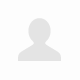
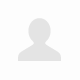

In [37]:
# 부모 탭의 페이지 소스 출력
driver.page_source

In [40]:
# 먼저 웹 드라이버에 모든 창을 확인
driver.window_handles
all_windows = driver.window_handles

# 창이 두 개이므로 두 개 나올 거얌. 첫번째가 부모탭, 두번째가 자식탭. 리스트.

In [41]:
# 자식 탭으로 이동
driver.switch_to.window(all_windows[1])


'<html lang="ko"><head><meta name="viewport" content="width=device-width"><meta charset="utf-8"><title>아이패드 : 네이버 쇼핑</title><link rel="shortcut icon" href="https://ssl.pstatic.net/shoppingsearch/static/pc/pc-231019-161626/img/favicon.ico"><meta property="og:title" content="아이패드 : 네이버 쇼핑"><meta property="og:image" content="https://ssl.pstatic.net/imgshopping/static/mo2014/icon/og_shopping_v2.png"><meta property="og:description" content="\'아이패드\'의 네이버쇼핑 검색 결과입니다"><meta name="next-head-count" content="7"><link rel="preconnect" href="https://static.nid.naver.com"><link rel="preconnect" href="https://lcs.naver.com"><link rel="preconnect" href="http://shopping.phinf.naver.net"><link rel="preconnect" href="https://ssl.pstatic.net"><link rel="preconnect" href="https://shopping-phinf.pstatic.net"><link rel="preconnect" href="https://volts.shopping.naver.com"><link rel="preload" href="https://ssl.pstatic.net/shoppingsearch/static/pc/pc-231019-161626/_next/static/css/cc814b6780774b79.css" as="sty
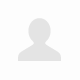
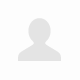

In [42]:
driver.page_source

In [43]:
soup = bs(driver.page_source, 'html.parser')

In [54]:
div_data = soup.find("div", attrs = {
    'class' : 'basicList_list_basis__uNBZx'
})

In [55]:
div_data

<div class="basicList_list_basis__uNBZx"><div><div><div class="adProduct_item__1zC9h"><div class="adProduct_inner__W_nuz"><div class="adProduct_img_area__wPZ_E"><div class="thumbnail_thumb_wrap__RbcYO _wrapper"><a class="thumbnail_thumb__Bxb6Z linkAnchor" data-i="86743046039" data-ms="1039504" data-nclick="N=a:lst*A.image,r:8,i:86743046039" href="https://adcr.naver.com/adcr?x=DZXBKevcufMzPU/p3JH4JP///w==kwrKS2PuHbcIeU8Qve0Q2YufCNgaiApZb5/N2lyBZ6D6hGTmgUOPQAn0QWe9IA5R7mNYS6VWyr3EfwusjSNDsL6TpF420tUYQ+m1utrvc2ct+uJbLrWdlAg//g3MSgmIvhA9t/8dVRGXWzEC2zLFdhkxP572W102lyjS7rAnwkp/MJkz7xIwWxC+8a5SqKa3Njpb03d3Sk7zN3COsDmUHX5Phd3PcexoQVuXfnF8eUDr3w45t3sBDsoTjyrjZKoBG8gq96j1WixQI3TYhUMZxb5nfOidqqFndGOqTtR9zBSd3l8wZUJILY8HjS62ks8Jb9+S37S7DeGFQCuIn4Ig04WuHzF3Gp89Rz02m2vu2eydd6ry8t3RSiPwuDvPrnsEhoTMkHc+kqqZVqoDZ+CdH4FZtH3uc+RRhFJU+KOYSkvqGDmCm/4ST86kXlUEfwaxuY0Jx7okgoiHzfG4uXiw7WP6Pruy3o5WCmlm0xYhN+HlYuzgE2ww4n6ONkBYAF8tpJncO+xqBavoQS7edM++DMnZ+ZAD7CYvEAg1s38FSK+7obvXXcT547cxR/VqcGSl40W0DEkMxEYeVA9ee

In [57]:
div_data.find_all('img')

img_list = div_data.find_all('img')

img_list

[<img alt="[보상나라] 새상품 Apple 아이패드 에어 5세대 64G WI-FI 블루 (Black)" height="140" src="https://searchad-phinf.pstatic.net/MjAyMzA5MTNfODkg/MDAxNjk0NTc0Mzk3NTI4._SNqAgXdyxIR17YP6WegRXlbRQO7XQNxD6p56W9xnLwg.NRN8lxHI6_0Zp9zCIjXHjcSob5XPBiOUhBi1DXMhlm8g.PNG/2546782-fc2dc558-b60b-4904-bd0f-6be0732a9959.png?type=f200" width="140"/>,
 <img alt="[보상나라] 새상품 Apple 아이패드 에어 5세대 256G WI-FI 핑크 (Black)" height="140" src="https://searchad-phinf.pstatic.net/MjAyMzA5MTNfMTgy/MDAxNjk0NTc0MjcyNTQx.lvEAK_BzmYKnuqC5xRMNjlhnNEImDLvt3wVI69JAF8Ig.ZdJKbvr6Lhsv6fZJikZjOVRcNzTyHTkEPhWSqAn86lwg.PNG/2546782-439cd113-55a9-47e1-ae42-46521b81d45f.png?type=f200" width="140"/>,
 <img alt="Apple 아이패드 10.2 2021년 9세대  실버  64GB  Wi-Fi MK2L3LL/A" height="140" src="https://shopping-phinf.pstatic.net/main_3184378/31843780901.67.jpg?type=f140" width="140"/>,
 <img alt="쿠팡" height="15" src="https://shopping-phinf.pstatic.net/20180724_27/6a487977-9071-4eeb-9da7-86b72cb1501c.jpg"/>,
 <img alt="쿠팡" src="https://ssl.pstatic.net/shoppingsea

In [58]:
img_list2 = []

for i in img_list:
    # 태그에서 alt속성의 값이 쿠팡이 아닌 데이터는 img_list2에 추가
    if i['alt'] != '쿠팡':
        img_list2.append(i['src'])
        
img_list2

['https://searchad-phinf.pstatic.net/MjAyMzA5MTNfODkg/MDAxNjk0NTc0Mzk3NTI4._SNqAgXdyxIR17YP6WegRXlbRQO7XQNxD6p56W9xnLwg.NRN8lxHI6_0Zp9zCIjXHjcSob5XPBiOUhBi1DXMhlm8g.PNG/2546782-fc2dc558-b60b-4904-bd0f-6be0732a9959.png?type=f200',
 'https://searchad-phinf.pstatic.net/MjAyMzA5MTNfMTgy/MDAxNjk0NTc0MjcyNTQx.lvEAK_BzmYKnuqC5xRMNjlhnNEImDLvt3wVI69JAF8Ig.ZdJKbvr6Lhsv6fZJikZjOVRcNzTyHTkEPhWSqAn86lwg.PNG/2546782-439cd113-55a9-47e1-ae42-46521b81d45f.png?type=f200',
 'https://shopping-phinf.pstatic.net/main_3184378/31843780901.67.jpg?type=f140',
 'https://shopping-phinf.pstatic.net/main_3590817/35908175921.jpg?type=f140',
 'https://shopping-phinf.pstatic.net/main_3153084/31530843620.20220705164247.jpg?type=f140',
 'https://shopping-phinf.pstatic.net/main_2928180/29281800623.20211020120244.jpg?type=f140',
 'https://shopping-phinf.pstatic.net/main_3531799/35317993621.20221118101511.jpg?type=f140',
 'https://ssl.pstatic.net/shoppingsearch/static/pc/pc-231019-161626/img/search/bpower_v1.png']